# Imports and Config

In [2]:
#!pip install scrapy
#!pip install datasets[vision]

#import scrapy
#from scrapy.crawler import CrawlerProcess
from bs4 import BeautifulSoup
import pdb
import pandas as pd
import numpy as np
from datasets import load_dataset
import os 
import random
from tqdm.notebook import tqdm
import json
import zipfile
import io

# Scraper - Get artist info from WikiArt Website

In [13]:
class ArtistItem(scrapy.Item):
    Id = scrapy.Field()
    URL = scrapy.Field()
    Name = scrapy.Field()
    OriginalName = scrapy.Field()
    BirthDate = scrapy.Field()
    BirthPlace = scrapy.Field()
    DeathDate = scrapy.Field()
    DeathPlace = scrapy.Field()
    ActiveYears = scrapy.Field()
    Nationality = scrapy.Field()
    ArtMovements = scrapy.Field()
    PaintingSchool = scrapy.Field()
    Genres = scrapy.Field()
    Fields = scrapy.Field()
    InfluencedOn = scrapy.Field()
    InfluencedBy = scrapy.Field()
    Teachers = scrapy.Field()
    Pupils = scrapy.Field()
    ArtInstitutions = scrapy.Field()
    FriendsAndCoworkers = scrapy.Field()
    Description = scrapy.Field()
    WikiDescription = scrapy.Field()
    WikipediaLink = scrapy.Field()

NameError: name 'scrapy' is not defined

In [ ]:
class WikiArtArtistSpider(scrapy.Spider):
    name = "wikiart_artist"
    allowed_domains = ["wikiart.org"]
    start_urls = ["https://www.wikiart.org/en/artists-by-nation"]
    id = 0

    custom_settings = {
        'FEEDS': {
            'artists.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }
    }


    def parse(self, response):
        for nation in response.xpath('//main/ul/li/a/@href').getall():
            yield response.follow(nation + "/text-list", callback=self.parse_nation)

    def parse_nation(self, response):
        for artist in response.xpath('//main/div/ul/li/a/@href').getall():
            yield response.follow(artist, callback=self.parse_artist)

    def parse_artist(self, response):
        name_raw = response.xpath('//main/div/article/h3/text()')
        name = name_raw.get().replace("  ", '').replace('\n', '') if name_raw else name_raw
        original_name_raw = response.xpath('//main/div/article/h4/text()').get()
        original_name = original_name_raw.replace("  ", '').replace('\n', '') if original_name_raw else original_name_raw

        birth_date = response.xpath('//main/div/article/ul/li/span[@itemprop="birthDate"]/text()').get()
        birth_place = response.xpath('//main/div/article/ul/li/span[@itemprop="birthPlace"]/text()').get()

        death_date = response.xpath('//main/div/article/ul/li/span[@itemprop="deathDate"]/text()').get()
        death_place = response.xpath('//main/div/article/ul/li/span[@itemprop="deathPlace"]/text()').get()

        active_years_raw = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Active Years:")]]]').get()
        active_years = active_years_raw.replace("<li>\n            <s>Active Years:</s>\n            ", '')\
            .replace("\n        </li>", '') if active_years_raw else active_years_raw

        nationality = response.xpath('//span[@itemprop="nationality"]/text()').get()

        art_movements = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Art Movement:")]]]/span/a/text()').getall()
        painting_school = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Painting School:")]]]/span/a/text()').getall()

        genres = response.xpath('//span[@itemprop="genre"]/text()').getall()
        fields = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Field:")]]]/span/a/text()').getall()

        influenced_by = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Influenced by:")]]]/a/text()').getall()
        influenced_on = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Influenced on:")]]]/a/text()').getall()

        teachers = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Teachers:")]]]/a/text()').getall()
        pupils = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Pupils:")]]]/a/text()').getall()

        art_institutions = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Art institution:")]]]/a/text()').getall()

        friends_and_coworkers = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Friends and Co-workers:")]]]/a/text()').getall()

        wikipedia_link = response.xpath('//main/div/article/ul/li[.//s[text()[contains(.,"Wikipedia:")]]]/a/@href').get()

        description_raw = response.xpath('//p[@itemprop="description"]').get()
        description = BeautifulSoup(description_raw, features="lxml").get_text() if description_raw else description_raw

        wiki_description_raw = response.xpath('//div[@id="info-tab-wikipediaArticle"]/p').get()
        wiki_description = BeautifulSoup(wiki_description_raw, features="lxml").get_text() if wiki_description_raw else wiki_description_raw

        yield ArtistItem({
            "Id": self.id,
            "URL": response.url,
            "Name": name,
            "OriginalName": original_name,
            "BirthDate": birth_date,
            "BirthPlace": birth_place,
            "DeathDate": death_date,
            "DeathPlace": death_place,
            "ActiveYears": active_years,
            "Nationality": nationality,
            "ArtMovements": art_movements,
            "PaintingSchool": painting_school,
            "Genres": genres,
            "Fields": fields,
            "InfluencedOn": influenced_on,
            "InfluencedBy": influenced_by,
            "Teachers": teachers,
            "Pupils": pupils,
            "ArtInstitutions": art_institutions,
            "FriendsAndCoworkers": friends_and_coworkers,
            "WikipediaLink": wikipedia_link,
            "Description": description,
            "WikiDescription": wiki_description,
        })

        self.id += 1

In [ ]:
process = CrawlerProcess()
process.crawl(WikiArtArtistSpider)
process.start()

Streaming output truncated to the last 5000 lines.
 'InfluencedOn': [],
 'Name': 'Bada Shanren ',
 'Nationality': 'Chinese',
 'OriginalName': '朱耷',
 'PaintingSchool': [],
 'Pupils': [],
 'Teachers': [],
 'URL': 'https://www.wikiart.org/en/bada-shanren',
 'WikiDescription': 'Bada Shanren (born Zhu Da ca. 1626—1705) was a Han '
                    'Chinese painter of ink wash painting and a calligrapher. '
                    'He was of royal descent, being a direct offspring of the '
                    'Ming dynasty prince Zhu Quan who had a feudal '
                    "establishment in Nanchang. His master lineage's accession "
                    'was revoked following the last Ning Lineage King Zhu '
                    "Chenhao's rebellion in 1521, but the rest of the lineage "
                    'was allowed to retain status in Jiangxi. Art historians '
                    'have named him as a brilliant painter of the period.\r'
                    ' Bada Shanren, a purported ch

In [ ]:
import pandas as pd

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2023-11-08 00:10:25 [numexpr.utils] INFO: NumExpr defaulting to 2 threads.


In [ ]:
artist_info = pd.read_csv("artists.csv")

In [ ]:
list(artist_info['Name'].str.strip().str.lower())

['sm sultan',
 'agim sulaj',
 'gennady mironov',
 '[ a y s h ]',
 'gazmend freitag',
 'tahir salahov',
 'ivan milev',
 'soltan soltanlı',
 'branko bačanović',
 'thiago boecan',
 'rodrigo franzao',
 'banksy',
 'marianne stokes',
 'matthias laurenz gräff',
 'alberto pereira',
 'ashley bickerton',
 'gerwald rockenschaub',
 'georg miciú',
 'heimo zobernig',
 'francis a. willey',
 'nzante spee',
 'gisela colon',
 'hifa cybe',
 'manfred kielnhofer',
 'david burdeny',
 'christopher willard',
 'jessica stockholder',
 'christian eckart',
 'barbara mcgivern',
 'charles gibbons',
 'landon mackenzie',
 'kent monkman',
 'richard hambleton',
 'wanda koop',
 'tony scherman',
 'amir baradaran',
 'zainul abedin',
 'ken danby',
 'ivan eyre',
 'haralampi g. oroschakoff',
 'claude tousignant',
 'yves gaucher',
 'mary pratt',
 'marjan eggermont',
 'armand vaillancourt',
 'jean-paul jerome',
 'rashid al khalifa',
 'marcel barbeau',
 'mimi parent',
 'kazuo nakamura',
 'jean-paul riopelle',
 'dorothea rockbur

# WikiArt Dataset

## Loading in Data

In [3]:
paintings = load_dataset('huggan/wikiart')
paintings = paintings['train']

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

/home/rmohe01/miniforge3/envs/MIE1517_Project/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [16]:
len(paintings)

81444

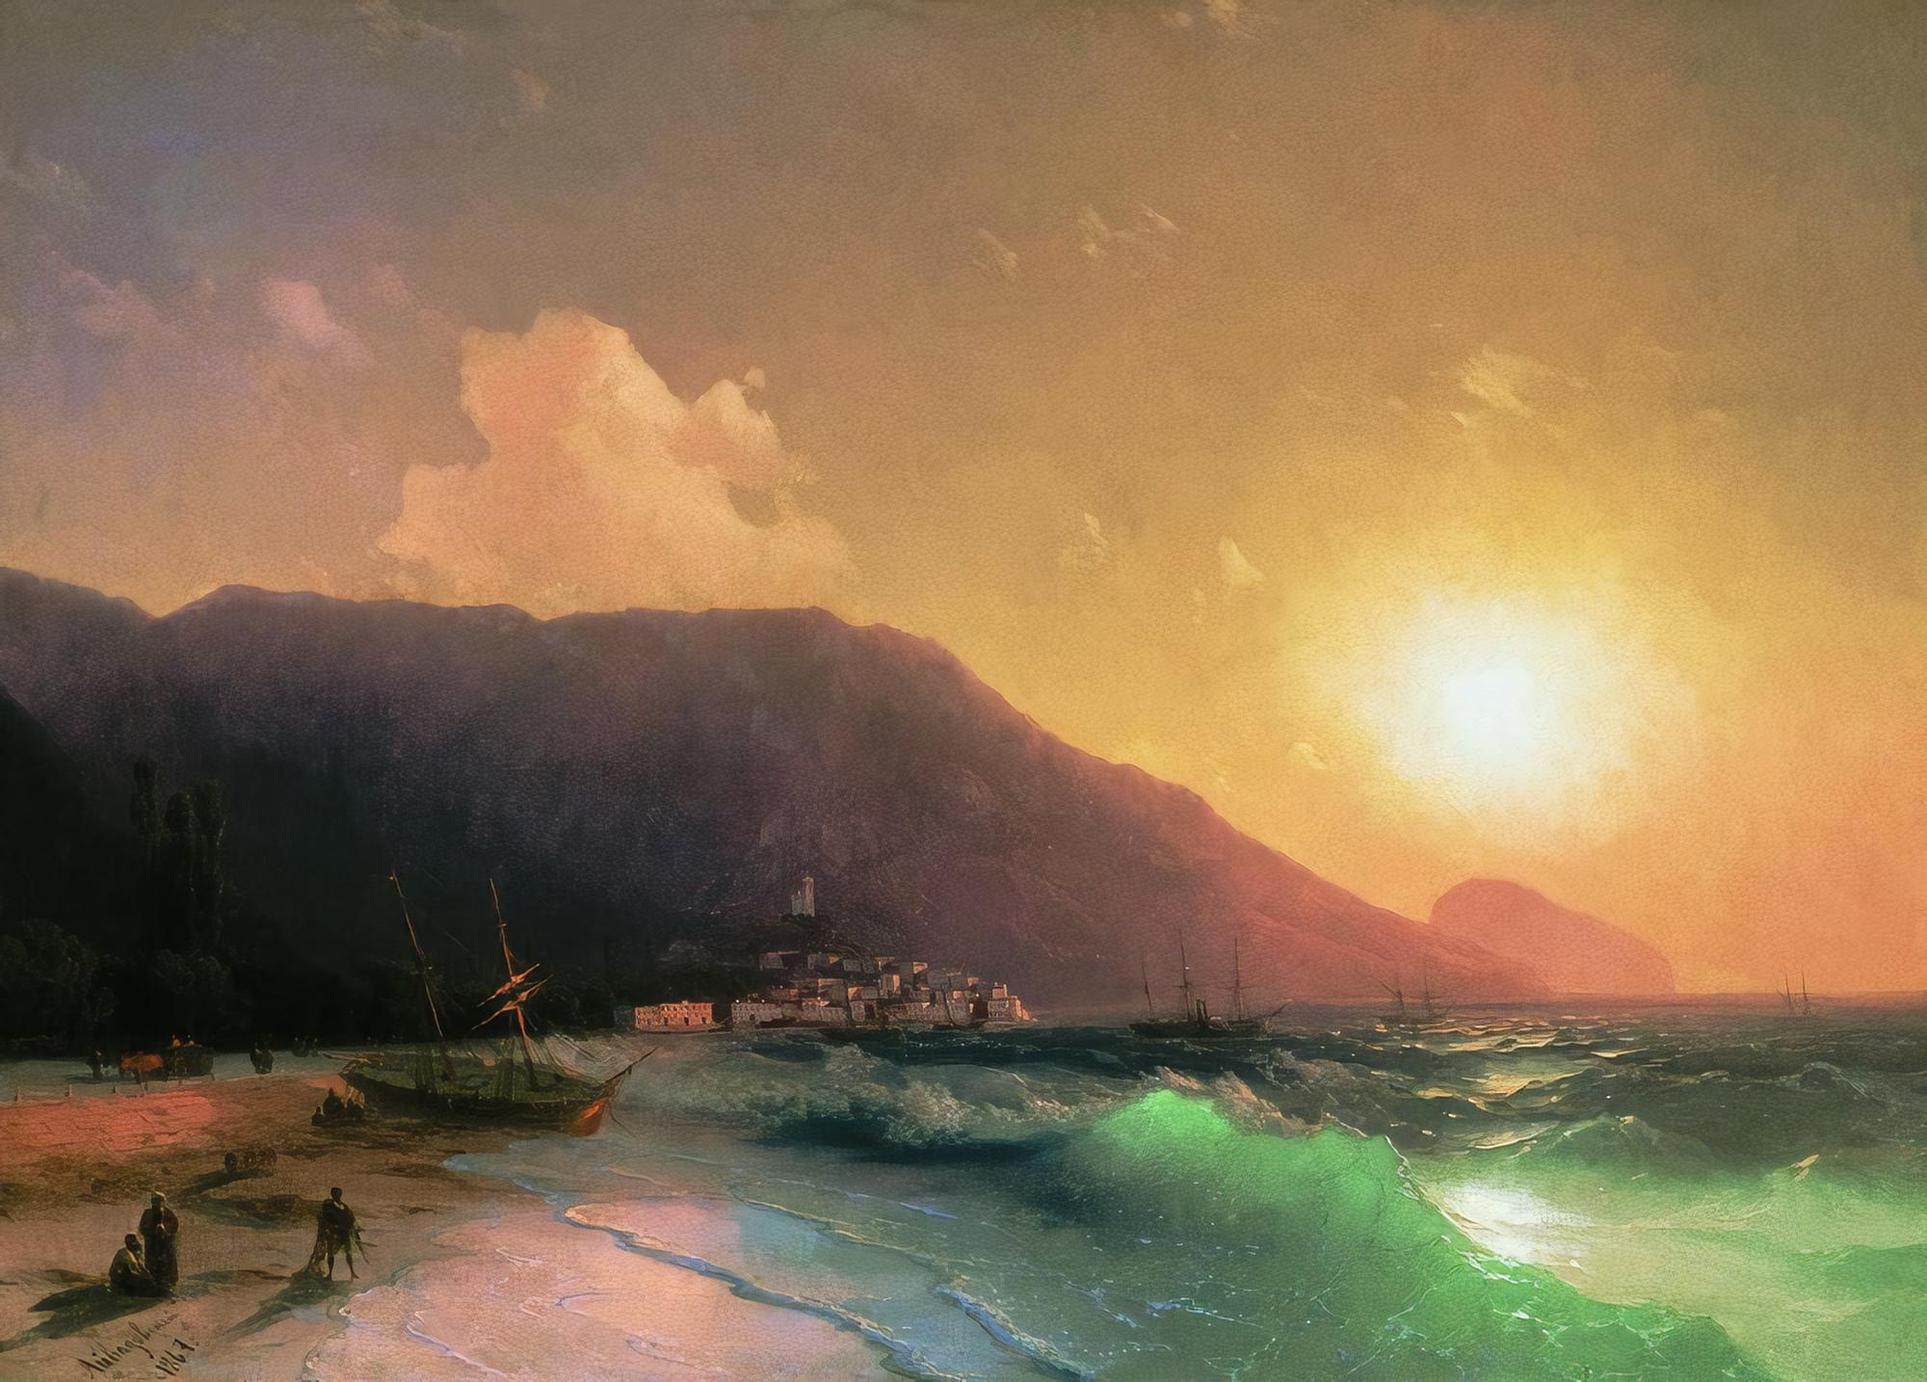

In [4]:
paintings[35]['image']

In [7]:
def crop_and_export_to_zip(zip_filename, data, crop_size=(512, 512)):
    '''
    Helper function to crop and compress images for exporting into a smaller dataset
    '''
    # Create a zip file
    with zipfile.ZipFile(zip_filename, 'w') as zip_file:
        # Loop through all the images in the dataset
        for i, row in tqdm(enumerate(data)):
            # get the image
            img = row['image']
            # get the side information (everything in the row but the image)
            side_info = row.copy()
            side_info.pop('image')
            image_filename = f"cropped_image_{i}.jpg"
            json_filename = f"cropped_image_{i}.json"

            # Get the dimensions of the image
            img_width, img_height = img.size
            
            # define crop dimensions
            crop_width, crop_height = crop_size

            # Check if the image is smaller than the desired crop size
            if img_width < crop_width or img_height < crop_height:
                print(f"Image {i} is too small for the desired crop size.")
                continue

            # Calculate random position for the crop
            left = random.randint(0, img_width - crop_width)
            upper = random.randint(0, img_height - crop_height)

            # Perform the crop
            cropped_img = img.crop((left, upper, left + crop_width, upper + crop_height))

            # Convert the cropped image to RGB
            cropped_img = cropped_img.convert('RGB')

            # Save the cropped image in JPEG format with optimization and reduced quality
            img_bytes_io = io.BytesIO()
            cropped_img.save(img_bytes_io, 'JPEG', optimize=True, quality=85)
            img_bytes_io.seek(0)

            # Write the cropped image bytes to the zip file
            zip_file.writestr(image_filename, img_bytes_io.read())

            # Write the side information to a JSON file and add it to the zip file
            zip_file.writestr(json_filename, json.dumps(side_info))

In [9]:
export_location = 'data/cropped_paintings.zip'
crop_and_export_to_zip(export_location, paintings)

0it [00:00, ?it/s]